In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import collections
import pandas as pd
import spacy
import en_core_web_sm


In [12]:
def simons_model_cw(steps, rho):
    population = np.zeros(steps)
    num_groups = 1
    population[0] = 1
    for i in range(steps - 1):
        if np.random.uniform(0,1) <= rho:
            num_groups += 1
            population[i + 1] = num_groups
        else:
            population[i + 1] = np.random.choice(population[0 : i + 1])
    # print(num_groups)
    return population

0.9579405981927397
0.9


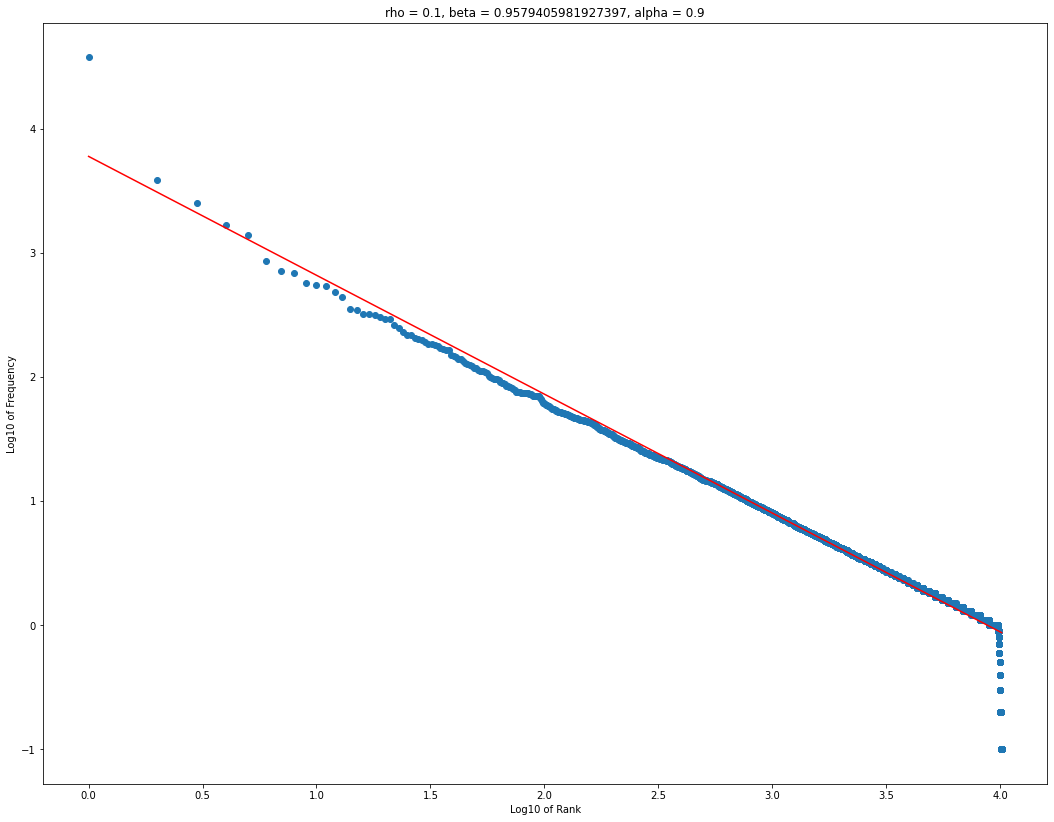

1.2094707614169578
0.99


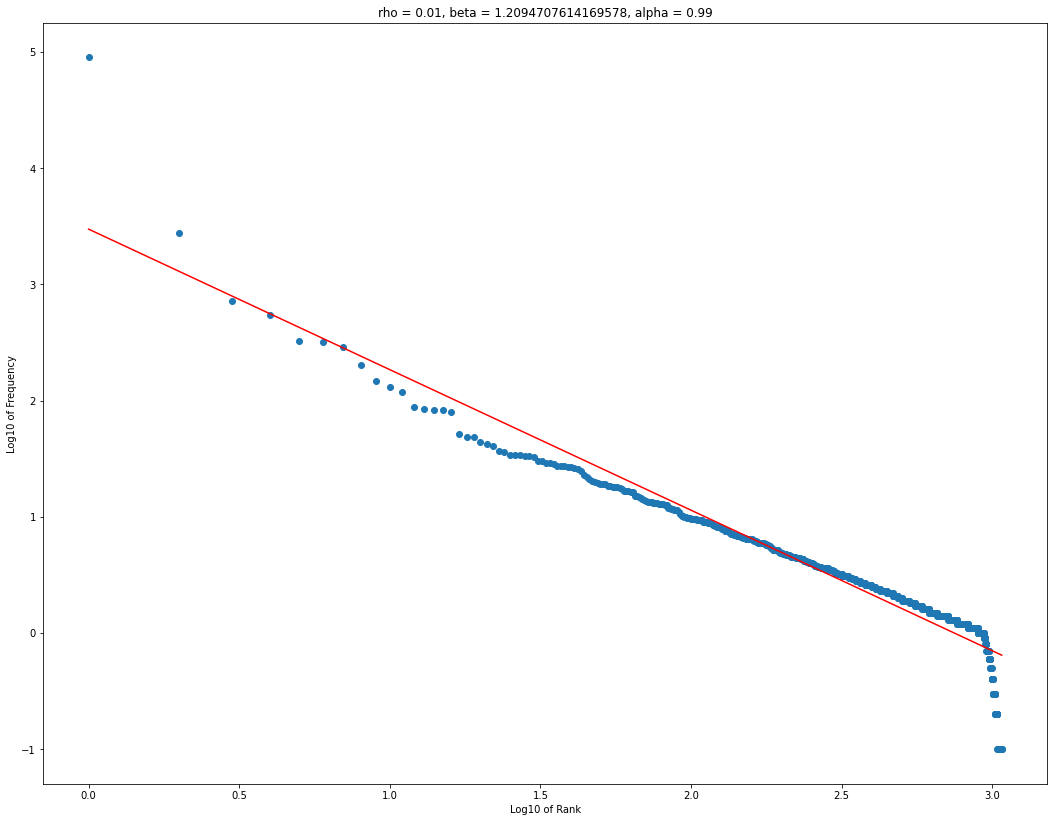

1.7525880656723347
0.999


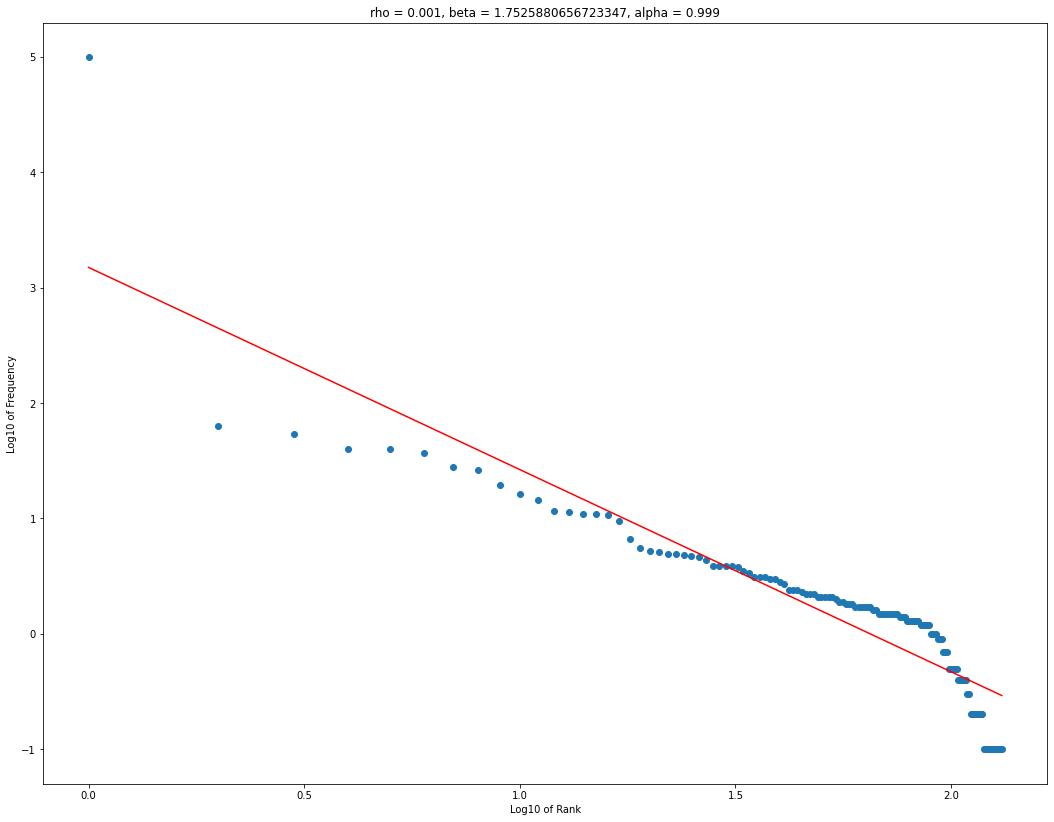

In [13]:
rhos = [0.1, 0.01, 0.001]
for rho in rhos:
    steps = 100000
    res = np.empty([10, steps])

    # run sim 10 - 100 times
    for i in range(10):
        res[i, :] = simons_model_cw(steps, rho)

    # find counts of each group
    (unique, counts) = np.unique(res, return_counts=True)

    # avg counts of each group
    avg_counts = np.true_divide(counts, 10)

    # Find ranks
    plot_array = sorted(avg_counts)[::-1]
    ranks = np.array([i + 1 for i in range(len(plot_array))])

    regr = stats.linregress(np.log10(ranks), np.log10(plot_array))
    beta = -regr.slope
    alpha = 1 - rho
    print(beta)
    print(alpha)

    plt.rcParams["figure.figsize"] = [18, 14]
    plt.scatter(np.log10(ranks), np.log10(plot_array))
    plt.plot(np.log10(ranks), regr.slope*np.log10(ranks) + regr.intercept, color="red")
    plt.title("rho = " + str(rho) + ", beta = " + str(beta) + ", alpha = " + str(alpha))
    plt.xlabel("Log10 of Rank")
    plt.ylabel("Log10 of Frequency")
    plt.show()





In [14]:
df = pd.read_csv('ulysses.txt', delimiter=': ', names=['word', 'count'])

# 5b
totalNumWords = df['count'].sum()
uniqueWords =len(df)
frac = uniqueWords/totalNumWords
print(f'5b {frac:.3f}')

# 5c
freq = collections.Counter(df['count'])
n1 = freq[1]/sum(freq.values())
n2 = freq[2]/sum(freq.values())
n3 = freq[3]/sum(freq.values())
print(f'{n1:.3f}  {n2:.3f}  {n3:.3f}')



5b 0.119
0.565  0.156  0.071


<ipython-input-14-aaa9441bba15>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('ulysses.txt', delimiter=': ', names=['word', 'count'])


In [15]:
try:
    nlp = spacy.load("en_core_web_sm")
except:
    nlp = en_core_web_sm.load()

def clean_text(doc):
    doc = [str(token).lower() for token in doc if token.is_punct !=
           True and token.is_space != True]
    return doc


In [16]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(clean_text, name="clean", last=True)
filename = "pride_prejudice.txt"
with open(filename) as text:
    words = text.read()
clean_words = nlp(words)
clean_words = np.array(clean_words[1:])

In [17]:
(w_unique, w_counts) = np.unique(clean_words, return_counts=True)


In [18]:
frac = len(w_counts)/w_counts.sum()
frac

0.05424428622516987

In [19]:
freq = collections.Counter(w_counts)
n1 = freq[1]/sum(freq.values())
n2 = freq[2]/sum(freq.values())
n3 = freq[3]/sum(freq.values())
print(f'{n1:.3f}  {n2:.3f}  {n3:.3f}')

0.413  0.138  0.091


In [20]:
filename = "monte_cristo.txt"
with open(filename) as text:
    words = text.read()
clean_words = nlp(words)
clean_words = np.array(clean_words[1:])

In [21]:
(f_unique, f_counts) = np.unique(clean_words, return_counts=True)

In [22]:
frac = len(f_counts)/f_counts.sum()
print(frac)

0.0994153465466631


In [23]:
freq = collections.Counter(f_counts)
n1 = freq[1]/sum(freq.values())
n2 = freq[2]/sum(freq.values())
n3 = freq[3]/sum(freq.values())
print(f'{n1:.3f}  {n2:.3f}  {n3:.3f}')

0.507  0.154  0.081
